# TP2 Robotica Movel - Roadmap

## Alunos
- Bernardo Nogueira Borges 2020006396
- Daniele Cassia Silva Diniz 2020076874


### Importando Libs

In [137]:
from coppeliasim_zmqremoteapi_client import RemoteAPIClient
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import networkx as nx
import numpy as np

client = RemoteAPIClient()
sim = client.require('sim')
np.set_printoptions(precision=3,suppress=True)

### Obtendo Objetos de Interesse

Imagem carregada


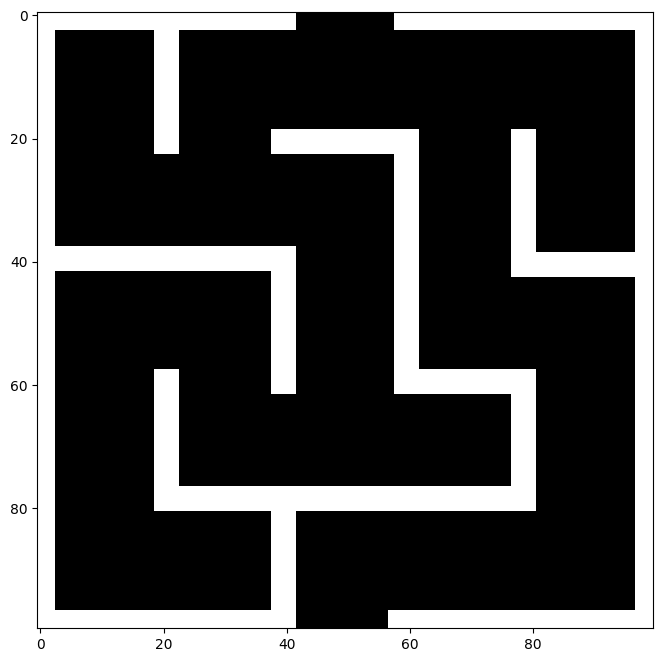

In [138]:
# Objetos de interesse

# Flag para evitar figuras nao utilizadas
CREATE_PLOTS = True

# Objetivos Maze
start_node = (6,17)
end_node = (17,6)

# Maze
figsize = (8,8)
img = 1 - mpimg.imread('../img/invMaze.png')
dims = [20,20] # Dimensoes do mapa (m)
cell_size = 1  # Tamanha da celula do grid (m)

# Definir range x e y para a conversao de mapa-cena
# TODO: Definir padrao para nao alterar
sceneXrange = (10,-10) # para direita
sceneYrange = (-10,10) # para baixo

# Apenas para garantir que só teremos esses dois valores
threshold = 0.2
img[img > threshold] = 1
img[img<= threshold] = 0

# Definindo figura 
if CREATE_PLOTS:
    fig = plt.figure(figsize=figsize,dpi=100)
    ax = fig.add_subplot(111,aspect='equal')
    ax.imshow(img, cmap='Greys', origin='upper')

print("Imagem carregada")

### Definindo Grid

Grid definida
20
20


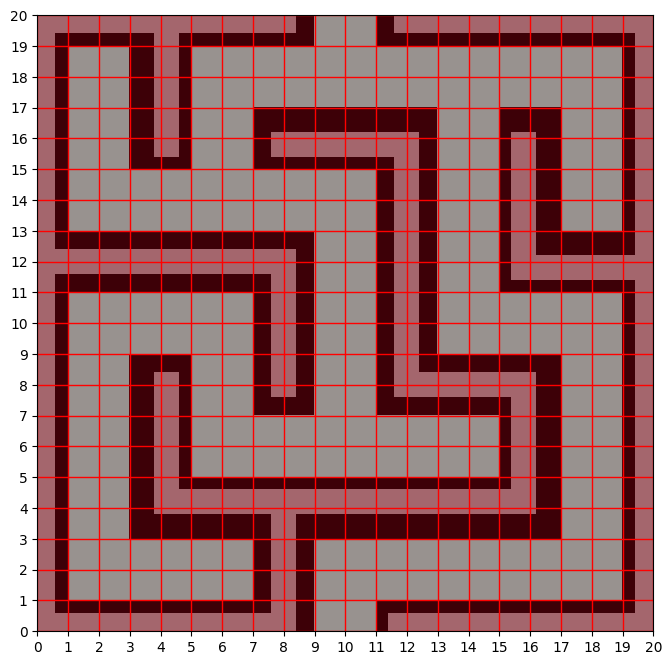

In [139]:
# Dimensões do mapa informado em metros (X, Y)
map_dims = np.array(dims)

# Escala Pixel/Metro
sy, sx = img.shape[:2] / map_dims

rows, cols = (map_dims / cell_size).astype(int)
grid = np.zeros((rows, cols))

gridXrange = (0,cols-1) # para direita
gridYrange = (0,rows-1) # para baixo


# Preenchendo o Grid
# Cada célula recebe o somatório dos valores dos Pixels
for r in range(rows):
    for c in range(cols):
        
        xi = int(c*cell_size*sx)
        xf = int(xi + cell_size*sx)
        
        yi = int(r*cell_size*sy)
        yf = int(yi + cell_size*sy)
                      
        grid[r, c] = np.sum(img[yi:yf,xi:xf])
        
# Binarizando as células como Ocupadas (1) ou Não-ocupadas (0)       
grid[grid > threshold] = 1
grid[grid<= threshold] = 0        

if CREATE_PLOTS:
    fig = plt.figure(figsize=(8,8), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')

    # Plotando Mapa e Células
    obj = ax.imshow(img, cmap='Greys', extent=(0, map_dims[1], 0, map_dims[0]), origin='upper')
    obj = ax.imshow(grid, cmap='Reds', extent=(0, map_dims[1], 0, map_dims[0]), alpha=.6)

    # Plotando as linhas do grid para facilitar a visualização
    ax.grid(which='major', axis='both', linestyle='-', color='r', linewidth=1)
    ax.set_xticks(np.arange(0, map_dims[1]+1, cell_size))
    ax.set_yticks(np.arange(0, map_dims[0]+1, cell_size))

print("Grid definida")
print(rows)
print(cols)

### Criando o Grafo para o nosso Grid

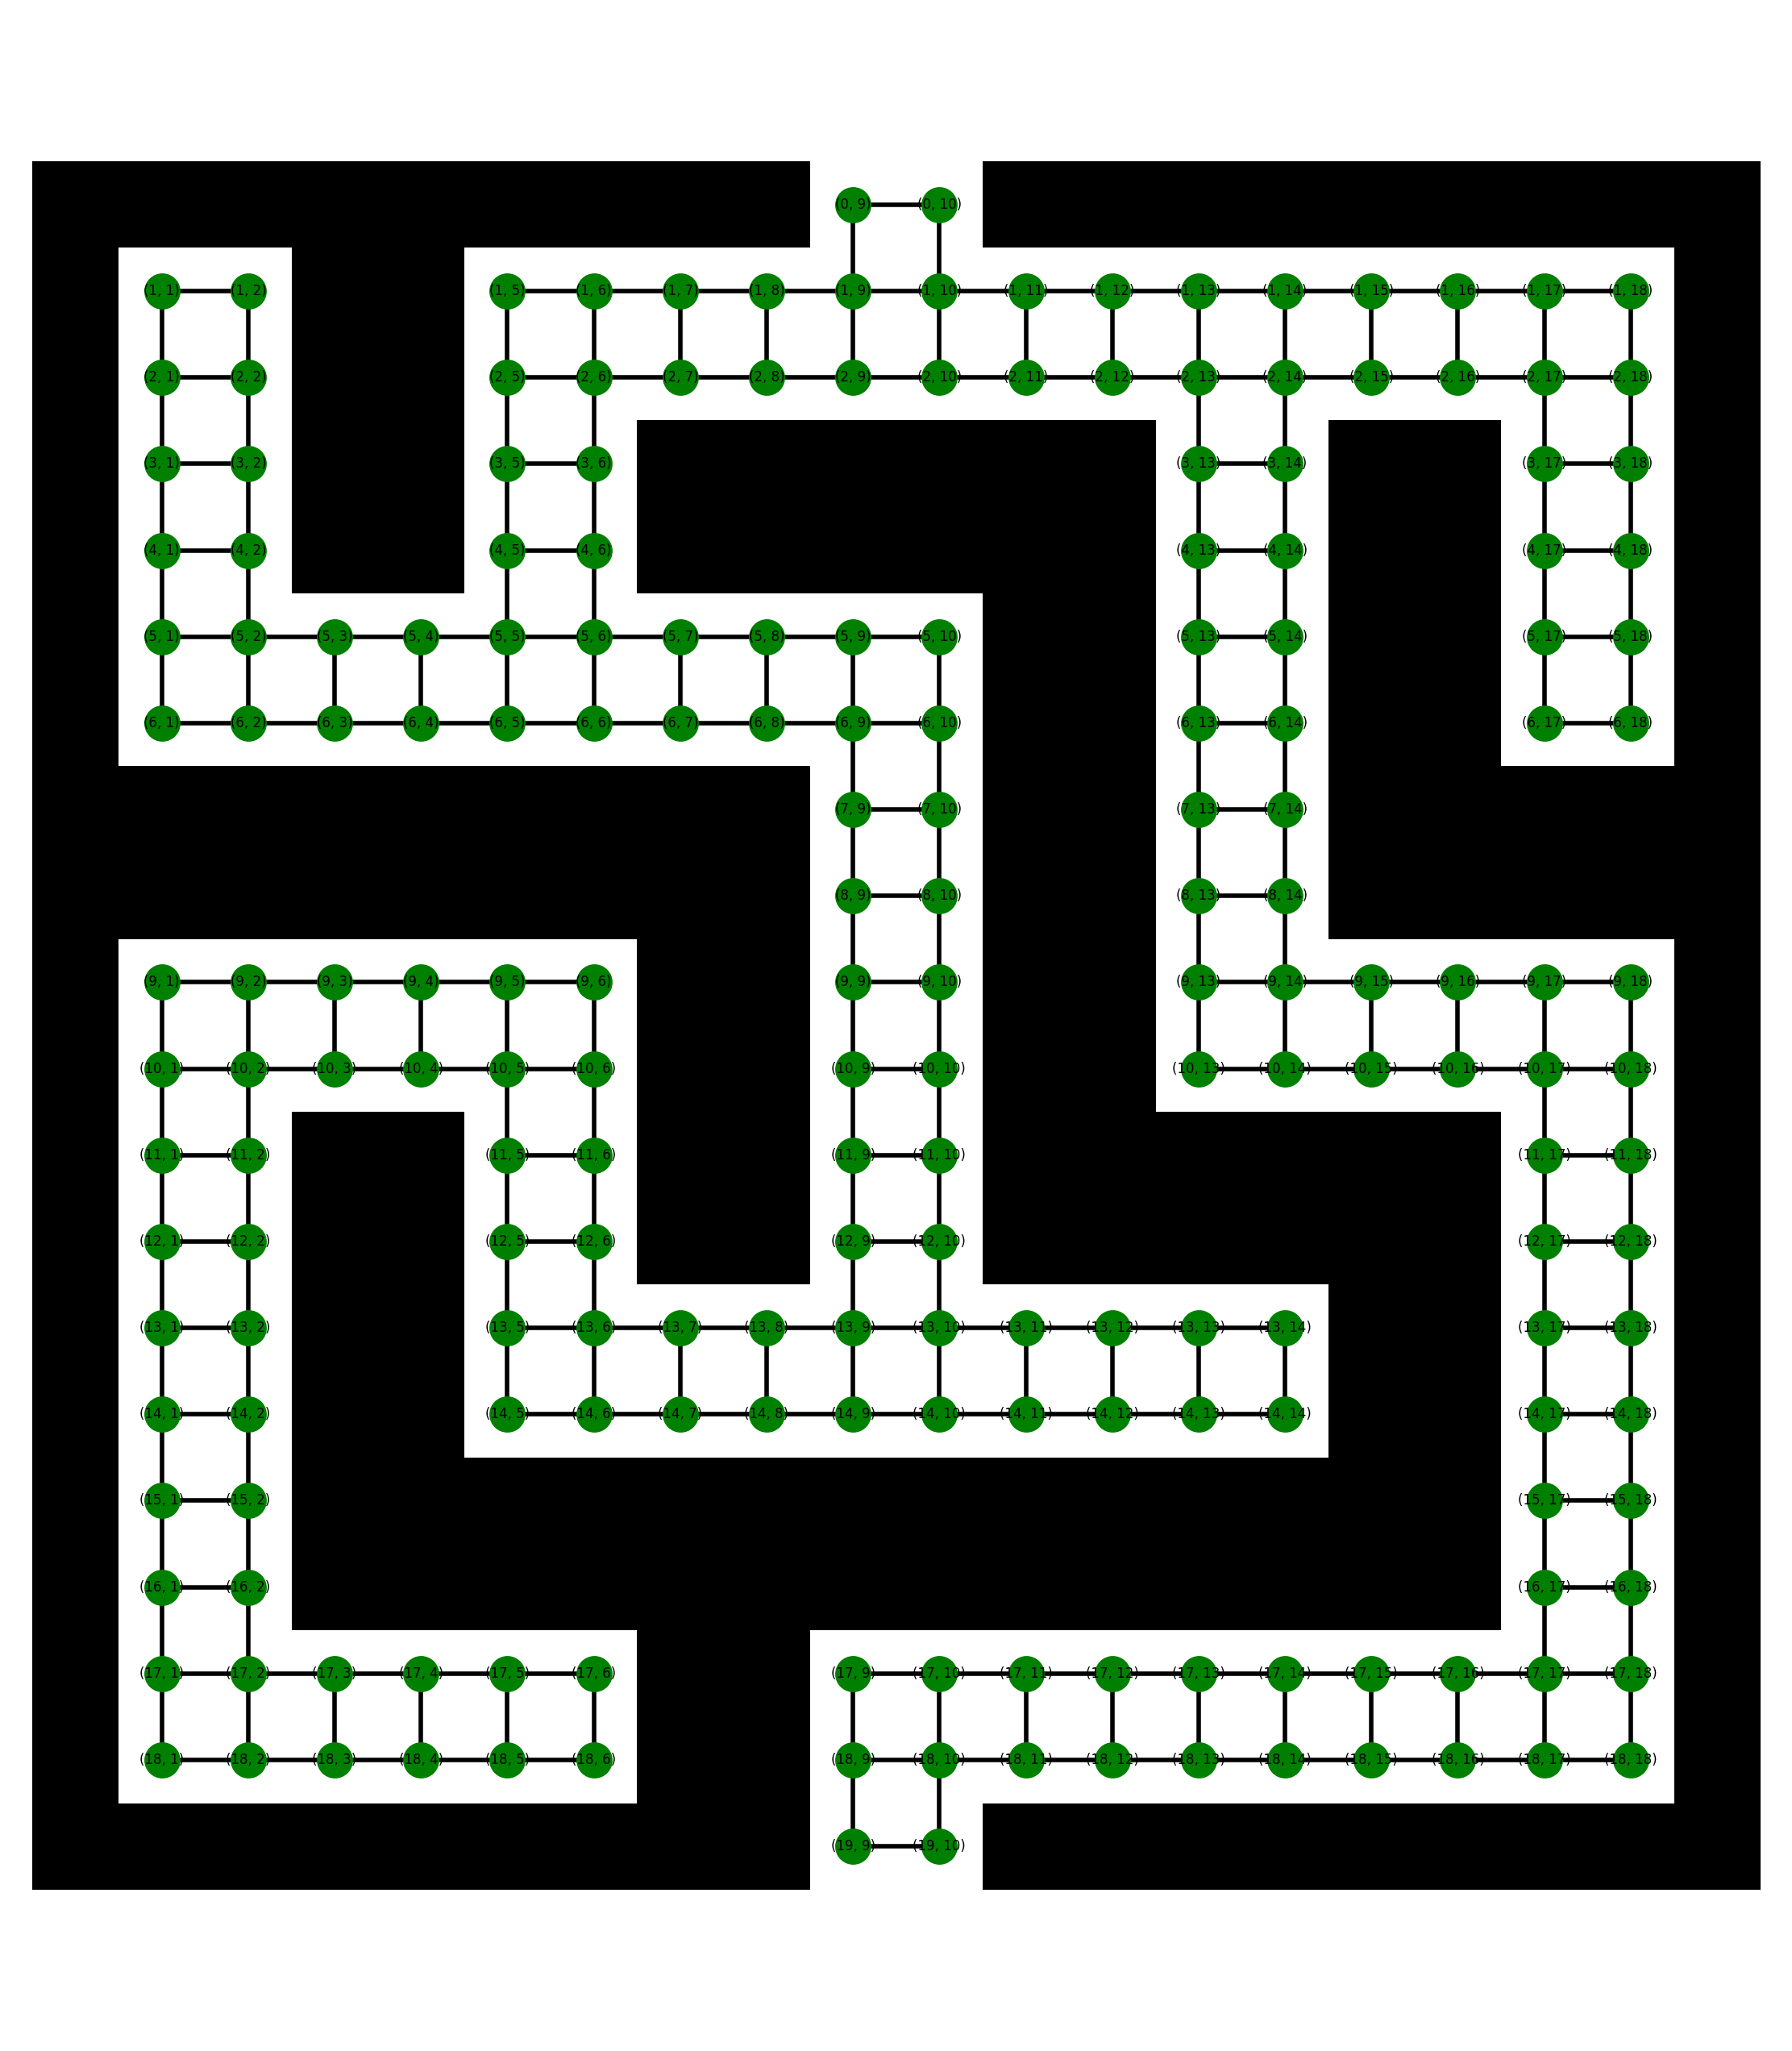

In [140]:

# Criando vértices em todas as células
G = nx.grid_2d_graph(rows, cols) 

# Removendo células que estão em células marcas com obstáculos
for r in range(rows):
    for c in range(cols):
        if grid[r][c] == 1:  
            G.remove_node((r,c))


if CREATE_PLOTS:
    fig = plt.figure(figsize=(8,8), dpi=400)
    ax = fig.add_subplot(111, aspect='equal')

    # Grid
    obj = ax.imshow(grid, cmap='Greys', extent=(0, map_dims[1], 0, map_dims[0]))

    ax.grid(which='major', axis='both', linestyle='-', color='r', linewidth=1)
    ax.set_xticks(np.arange(0, map_dims[1]+1, cell_size))
    ax.set_yticks(np.arange(0, map_dims[0]+1, cell_size))

    # Os vértices serão plotados no centro da célula  
    pos = { node: (node[1]*cell_size+cell_size/2, map_dims[0]-node[0]*cell_size-cell_size/2) for node in G.nodes() }
    nx.draw(G, pos, font_size=3, with_labels=True, node_size=50, node_color="g", ax=ax)

### Determinar menor caminho

Menor caminho identificado


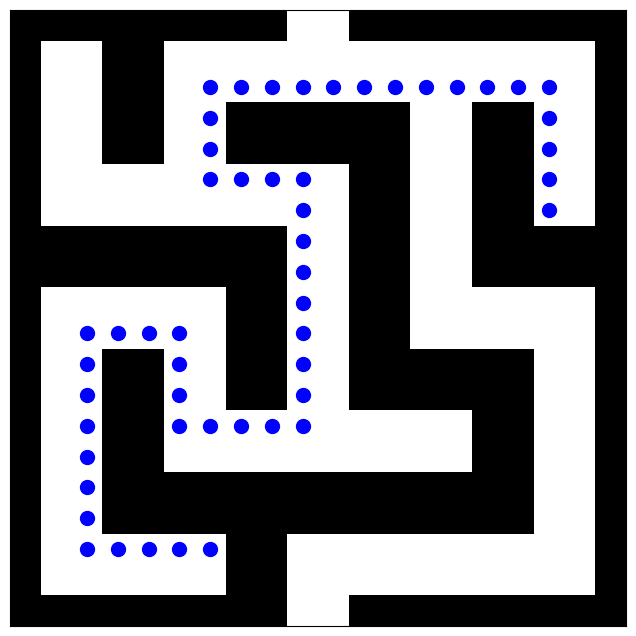

In [141]:
path = nx.shortest_path(G, source=start_node, target=end_node)

if CREATE_PLOTS:
    fig = plt.figure(figsize=(8,8), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')

    # Mapa
    obj = ax.imshow(grid, cmap='Greys', extent=(0, map_dims[1], 0,map_dims[0]))

    nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=100, node_color='b')

print("Menor caminho identificado")

## Movendo o robô

In [142]:
print("TODO")
print("Usando os pontos:")
print(path)
print(f"Mover o robo de {start_node} ate {end_node}")

def Rz(theta):
    return np.array(
        [[ np.cos(theta), -np.sin(theta), 0 ],
         [ np.sin(theta), np.cos(theta) , 0 ],
         [ 0            , 0             , 1 ]])


TODO
Usando os pontos:
[(6, 17), (5, 17), (4, 17), (3, 17), (2, 17), (2, 16), (2, 15), (2, 14), (2, 13), (2, 12), (2, 11), (2, 10), (2, 9), (2, 8), (2, 7), (2, 6), (3, 6), (4, 6), (5, 6), (5, 7), (5, 8), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9), (10, 9), (11, 9), (12, 9), (13, 9), (13, 8), (13, 7), (13, 6), (13, 5), (12, 5), (11, 5), (10, 5), (10, 4), (10, 3), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (17, 3), (17, 4), (17, 5), (17, 6)]
Mover o robo de (6, 17) ate (17, 6)


In [143]:
def convertLinear(s1,s2):
    (low1,up1) = s1
    (low2,up2) = s2
    def fn(x):
        x -= low1
        if low1 > up1: x *= -1
        x /= abs(up1 - low1)
        # Reached 0,1
        x *= abs(up2 - low2)
        if low2 > up2: x *= -1
        x += low2
        return x
    return fn
       
def gridToScene(coords):
    (x,y) = coords
    fx = convertLinear(gridXrange,sceneXrange)
    fy = convertLinear(gridYrange,sceneYrange)
    return (fy(y),fx(x))

def sceneToGrid(coords):
    (x,y) = coords
    fx = convertLinear(sceneXrange,gridXrange)
    fy = convertLinear(sceneYrange,gridYrange)
    return (fy(y),fx(x))


In [144]:
sim.stopSimulation()

# Iniciar o robotino
L = 0.135 # m
r = 0.040 # m
robotino = sim.getObject("/robotino")
start_pos = gridToScene(start_node)
sim.setObjectPosition(robotino,list(map(int,[start_pos[0],start_pos[1],1.99])))

wheels = [0]*3
for i in range(3):
    wheels[i] = sim.getObject(f"/wheel{i}_joint")

    # Parar as rodas inicialmente
    sim.setJointTargetVelocity(wheels[i],0)


In [136]:


# Cinemática Direta
Mdir = np.array([[-r/np.sqrt(3), 0, r/np.sqrt(3)], [r/3, (-2*r)/3, r/3], [r/(3*L), r/(3*L), r/(3*L)]])
        
# Goal configuration (x, y, theta)    
sim.startSimulation()

for midpoint in path:

    # ? Mudar para cada ponto desejado :)
    curr_goal_pos = gridToScene(midpoint)
    qgoal = np.array([curr_goal_pos[0], curr_goal_pos[1] , 0.05])

    # Frame que representa o Goal
    goalObject = sim.getObject("/Goal")
    sim.setObjectPosition(goalObject,list(map(int,[qgoal[0],qgoal[1],0])))
    sim.setObjectOrientation(goalObject,list(map(int,[0,0,qgoal[2]])))

    gain = [[1.1,0,0],
            [0,1.1,0],
            [0,0,1.1]]

    while True:
        pos = sim.getObjectPosition(robotino)
        ori = sim.getObjectOrientation(robotino)
        q = np.array([pos[0],pos[1],ori[2]])

        error = qgoal - q

        # Margem aceitavel de distancia
        if np.linalg.norm(error[:2]) < 0.3:
            break

        # Controller
        qdot = gain @ error

        # Cinematica Inversa
        # w1, w2, w3
        Minv = np.linalg.inv(Rz(q[2]) @ Mdir)
        u = Minv @ qdot

        # Enviando velocidades
        for i in range(3):
            sim.setJointTargetVelocity(wheels[i], u[i])
    
    print(f"reached {midpoint}")

for i in range(3):
    sim.setJointTargetVelocity(wheels[i], 0)

sim.stopSimulation()


reached (6, 17)
reached (5, 17)
reached (4, 17)


KeyboardInterrupt: 